In [1]:
import numpy as np
from matplotlib import pyplot as plt
import timeit

%matplotlib inline
%load_ext autoreload
%autoreload 2

import h5py
from pathlib import Path
from FKMC.jobmanager import *

In [2]:
np.logspace(1.5,2.5,10, dtype = np.int)

array([ 31,  40,  52,  68,  87, 113, 146, 189, 244, 316])

In [3]:
config = dict(
              mcmc_routine='quantum_cython_mcmc',
              N_steps = 1000,
              bins = 10,
              N_burn_in = 100,
              N_system = np.logspace(1.5,2.5,10, dtype = np.int),
              mu = 0,
              beta = np.array([0.6,0.7,0.8,1.0]),
              U = 5,
              V = -1,
              alpha = 1.5,
              outer_loop = np.array(['beta'], dtype=h5py.special_dtype(vlen=str)),
              inner_loop = np.array(['N_system'], dtype=h5py.special_dtype(vlen=str)),
              quantum = True,
              output_history = False,
              output_correlator = False,
              output_state = False,
              energy_max = 8,
              energy_min = -8,
              N_energy_bins = 1000,
            )

working_dir = Path('../data/IPR_scaling_2')
setup_mcmc(config, working_dir, overwrite = True)

config = read_config_file(working_dir)
config

INFO:FKMC.jobmanager:Working in: ../data/IPR_scaling_2
INFO:FKMC.jobmanager:Sample results:
DEBUG:FKMC.jobmanager:flag_6: array(shape=(2,), dtype=int64)
DEBUG:FKMC.jobmanager:classical_energies_moments: array(shape=(9,), dtype=float64)
DEBUG:FKMC.jobmanager:numbers_moments: array(shape=(9,), dtype=float64)
DEBUG:FKMC.jobmanager:magnetisations_moments: array(shape=(9,), dtype=float64)
DEBUG:FKMC.jobmanager:quantum_energies_moments: array(shape=(9,), dtype=float64)
DEBUG:FKMC.jobmanager:classical_energies_moments_err: array(shape=(9,), dtype=float64)
DEBUG:FKMC.jobmanager:numbers_moments_err: array(shape=(9,), dtype=float64)
DEBUG:FKMC.jobmanager:magnetisations_moments_err: array(shape=(9,), dtype=float64)
DEBUG:FKMC.jobmanager:quantum_energies_moments_err: array(shape=(9,), dtype=float64)
DEBUG:FKMC.jobmanager:q_energy_histogram: array(shape=(1000,), dtype=float64)
DEBUG:FKMC.jobmanager:IPR_histogram: array(shape=(1000,), dtype=float64)
DEBUG:FKMC.jobmanager:q_energy_histogram_bins: arr

{'mcmc_routine': 'quantum_cython_mcmc',
 'N_steps': 1000,
 'bins': 10,
 'N_burn_in': 100,
 'N_system': array([ 31,  40,  52,  68,  87, 113, 146, 189, 244, 316]),
 'mu': 0,
 'beta': array([0.6, 0.7, 0.8, 1. ]),
 'U': 5,
 'V': -1,
 'alpha': 1.5,
 'outer_loop': array(['beta'], dtype=object),
 'inner_loop': array(['N_system'], dtype=object),
 'quantum': True,
 'output_history': False,
 'output_correlator': False,
 'output_state': False,
 'energy_max': 8,
 'energy_min': -8,
 'N_energy_bins': 1000}

In [7]:
import logging
logging.getLogger().setLevel(logging.INFO)
working_dir = Path('../data/IPR_scaling')-
gather_mcmc(working_dir, do_all = False)

INFO:FKMC.jobmanager:Number of Jobs to copy in: 1
INFO:FKMC.jobmanager:Job IDs: [0]...
INFO:FKMC.jobmanager:Couldn't open ../data/IPR_scaling/jobs/job_0.hdf5
INFO:FKMC.jobmanager:missing : []
INFO:FKMC.jobmanager:Jobs attempted this time: 1
INFO:FKMC.jobmanager:Overall completion: 59 / (60, 10)
INFO:FKMC.jobmanager:File size: 0.01Gb


[]

['V', 'beta', 'U', 'N_system', '']
None
V = -1.0, U = 2.0


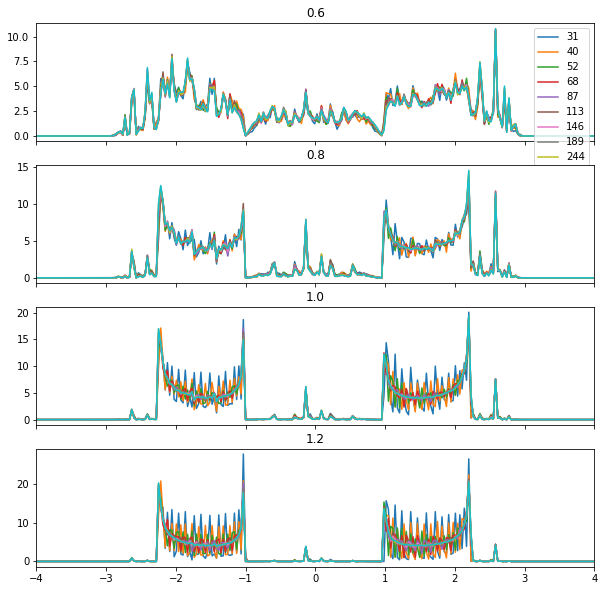

In [20]:
class objectview(object):
    def __init__(self, dict_like):
        self.dict_like = dict_like

    def __getattr__(self, name):
        return self.dict_like[name]

result_filename = working_dir / 'results.hdf5'
with h5py.File(result_filename, 'r') as data:
        r = objectview(data)
        config = objectview(data.attrs)
        print(print([dim.label for dim in r.numbers_moments.dims]))

        f, axes = plt.subplots(config.beta.size,1, figsize = (10,10), sharex = 'col')
        Uindx = 2
        Vindx = 2
        print(f'V = {config.V[Vindx]}, U = {config.U[Uindx]}')
        for j,beta in enumerate(config.beta):
            for i,N in enumerate(config.N_system):
                axes[j].plot(r.q_energy_histogram_bins[Vindx,j,Uindx,i,:-1]  - config.U[Uindx]/2,  r.q_energy_histogram[Vindx,j,Uindx,i,:] / N, label = N)
                axes[j].set(title = f'{beta}', xlim = (-4,4))
        axes[0].legend()
        #axes.set(ylim=(-1,100))

['V', 'beta', 'U', 'N_system', '']
None
V = -1.0, U = 5.0


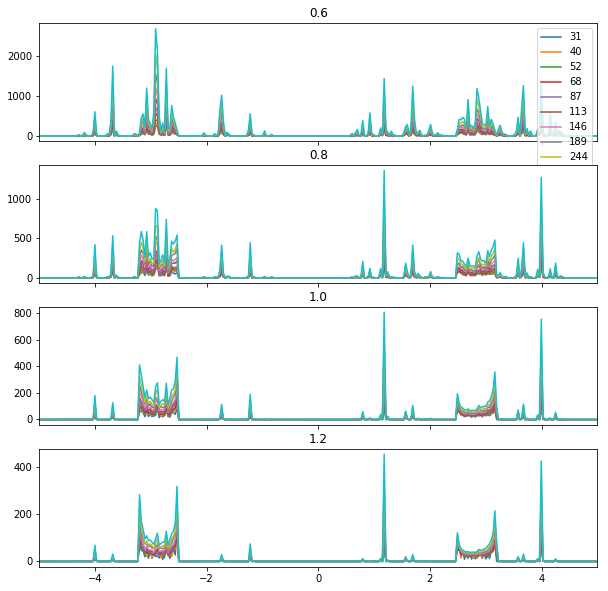

In [40]:
with h5py.File(result_filename, 'r') as data:
        r = objectview(data)
        config = objectview(data.attrs)
        print(print([dim.label for dim in r.numbers_moments.dims]))

        f, axes = plt.subplots(config.beta.size,1, figsize = (10,10), sharex = 'col')
        Uindx = 4
        Vindx = 2
        print(f'V = {config.V[Vindx]}, U = {config.U[Uindx]}')
        for j,beta in enumerate(config.beta):
            for i,N in enumerate(config.N_system):
                axes[j].plot(r.q_energy_histogram_bins[Vindx,j,Uindx,i,:-1]  - config.U[Uindx]/2,  r.IPR_histogram[Vindx,j,Uindx,i,:], label = N)
                axes[j].set(title = f'{beta}', xlim = (-5,5))
                #axes[j].text(0,0,f'{r.runtime[Vindx,j,Uindx,i,0]}')
        axes[0].legend()
        #axes.set(ylim=(-1,100))